# Example 02: Causal discovery with a set number of features

-------------------------------------------

## Overview


 - AitiaExplorer allows you select the number of important features that are passed into the causal disovery process.
 - This can provide quick insights into how the most important features of the data interact causally.
 - This example gives an overview of selecting only a few features of a dataset for causal analysis.

### Imports

In [20]:
import os
import sys
import math
import networkx as nx
from pycausal.pycausal import pycausal
import matplotlib.pyplot as plt
from IPython.display import display, HTML

module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.app import App

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

### Set up for causal discovery

- First create an AitiaExplorer instance and using it to load some simulated data into a panda dataframe.

In [2]:
aitia = App()

In [56]:
df = aitia.data.simulated_data_1()

In [57]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1,1,0,0,1,2,0,1,2,1
1,2,1,0,0,1,1,1,0,1,2
2,0,2,1,1,1,0,0,2,2,1
3,0,1,0,0,0,1,2,1,1,1
4,0,1,0,1,1,1,2,2,2,1


- This simulated data also has a known causal graph. We will load this as we can use it for testing.
- This causal graph is stored as [DOT graph description language](https://en.wikipedia.org/wiki/DOT_%28graph_description_language%29)

In [59]:
target_str_dot = aitia.data.simulated_data_1_graph()

In [60]:
target_str_dot

'digraph g {\n "X1" -> "X3" [arrowtail=none, arrowhead=normal];\n "X10" -> "X4" [dir=both, arrowtail=normal, arrowhead=none];\n "X2" -> "X7" [arrowtail=none, arrowhead=normal];\n "X2" -> "X9" [arrowtail=none, arrowhead=normal];\n "X10" -> "X7" [dir=both, arrowtail=normal, arrowhead=none];\n "X2" -> "X8" [arrowtail=none, arrowhead=normal];\n "X1" -> "X10" [arrowtail=none, arrowhead=normal];\n "X4" -> "X8" [arrowtail=none, arrowhead=normal];\n "X3" -> "X8" [arrowtail=none, arrowhead=normal];\n "X2" -> "X3" [arrowtail=none, arrowhead=normal];\n}\n'

- Now we need to select the causal discovery algorithms and feature selection algorithms to use.

In [3]:
feature_selection_list = []
feature_selection_list.append(aitia.feature_selection.LINEAR_REGRESSION)
feature_selection_list.append(aitia.feature_selection.PRINCIPAL_FEATURE_ANALYSIS)
feature_selection_list.append(aitia.feature_selection.RANDOM_FOREST)
feature_selection_list.append(aitia.feature_selection.RECURSIVE_FEATURE_ELIMINATION)
feature_selection_list.append(aitia.feature_selection.XGBOOST)

In [4]:
algorithm_list = []
algorithm_list.append(aitia.algo_runner.PC)
algorithm_list.append(aitia.algo_runner.FCI)
algorithm_list.append(aitia.algo_runner.FGES_continuous)
algorithm_list.append(aitia.algo_runner.GFCI_continuous)
algorithm_list.append(aitia.algo_runner.RFCI_continuous)

### Run the causal discovery analysis

- Now we will run the causal discovery analysis.
- First we need to start a background Java VM using py-causal as the algorithms are implemented in Java.
- Then we will run the analysis using the `run_analysis` method and AitiaExplorer will return a summary and some useful results.
- We will set the number of features arbitrarily at 7.

In [62]:
pc = pycausal()
pc.start_vm()

In [63]:
# pass in the dataframe, the target graph, the number of features, the causal discovery algorithms list to run,
# the feature selections algorithms to run and the py-causal object...
# we will ignore the returned target graph as we already have it...
results, summary, _ = aitia.run_analysis( df,
                                       target_graph_str=target_str_dot,
                                       n_features=7,
                                       feature_selection_list=feature_selection_list,
                                       algorithm_list=algorithm_list,
                                       pc=pc)

Running causal discovery on features selected by LINEAR_REGRESSION
There are 0 latent edges in the reduced dataset
Running causal discovery using PC
Running causal discovery using FCI
Running causal discovery using FGES-continuous
Running causal discovery using GFCI-continuous
Running causal discovery using RFCI-continuous
Completed causal discovery on features selected by LINEAR_REGRESSION
Running causal discovery on features selected by PRINCIPAL_FEATURE_ANALYSIS
There are 0 latent edges in the reduced dataset
Running causal discovery using PC
Running causal discovery using FCI
Running causal discovery using FGES-continuous
Running causal discovery using GFCI-continuous
Running causal discovery using RFCI-continuous
Completed causal discovery on features selected by PRINCIPAL_FEATURE_ANALYSIS
Running causal discovery on features selected by RANDOM_FOREST
There are 0 latent edges in the reduced dataset
Running causal discovery using PC
Running causal discovery using FCI
Running causal

### Display the results

- The results can then be examined using the summary which is just a returned dataframe.
- The AUPRC is a measure of the Area Under the Precision Recall curve, a useful performance metric.
- The Structural Hamming Distance (SHD) measures how close the graph returned by the causal algorithm was to the target graph.

In [64]:
display(HTML(summary.to_html()))

,No. of Features Req.,Causal Algorithm,Feature Selection Method,AUPRC,SHD
0,7,PC,LINEAR_REGRESSION,0.662500,8
1,7,FCI,LINEAR_REGRESSION,0.662500,8
2,7,FGES-continuous,LINEAR_REGRESSION,0.662500,8
3,7,GFCI-continuous,LINEAR_REGRESSION,0.662500,8
4,7,RFCI-continuous,LINEAR_REGRESSION,0.662500,8
5,7,PC,PRINCIPAL_FEATURE_ANALYSIS,0.370313,10
6,7,FCI,PRINCIPAL_FEATURE_ANALYSIS,0.370313,10
7,7,FGES-continuous,PRINCIPAL_FEATURE_ANALYSIS,0.370313,10
8,7,GFCI-continuous,PRINCIPAL_FEATURE_ANALYSIS,0.370313,10
9,7,RFCI-continuous,PRINCIPAL_FEATURE_ANALYSIS,0.370313,10


- We can now graph the results of the run using the summary (which is just a pandas dataframe).
- The best results should have a lower SHD and a higher AUPRC.

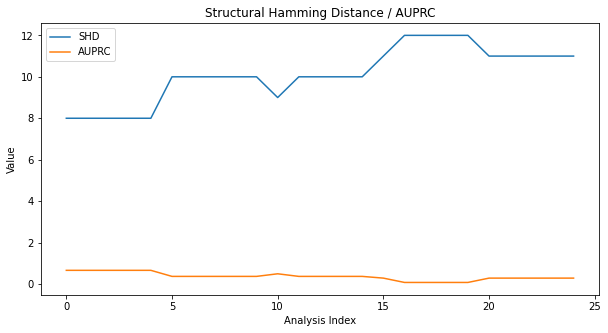

In [65]:
plt.rcParams["figure.figsize"] = (10, 5)

plt.plot(summary.index, summary['SHD'], label='SHD')
plt.plot(summary.index, summary['AUPRC'], label='AUPRC')
plt.title('Structural Hamming Distance / AUPRC')
plt.xlabel('Analysis Index')
plt.ylabel('Value')
plt.legend()
plt.show()

- We can see that the best returns were from earlier in the run using the features returned from linear regression.
- The PC algorithm in conjunction with the features returned from the random forest classifier are also better than most.

----------------------

- We can view the causal graph that was returned by examining the AnalysisResults object that was returned and compare the two causal graphs / feature lists that were returned by the PC algorithm.
- First examine the results from the PC algorithm and features selected by linear regression.

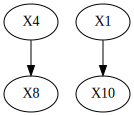

In [75]:
results[0].causal_graph.draw()

- Next examine the results from the PC algorithm and features selected by the random forest classifier.

In [73]:
results[0].feature_list

['X1', 'X9', 'X6', 'X10', 'X4', 'X8', 'X3']

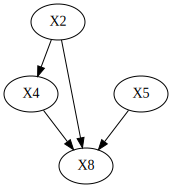

In [69]:
results[10].causal_graph.draw()

In [71]:
results[10].feature_list

['X3', 'X4', 'X5', 'X1', 'X2', 'X8', 'X9']

- We can view the target causal graph by using some of the causal graph utility methods provided by AitiaExplorer.
- As you can see, the results from the PC algorithm and features selected by the random forest classifier are much closer to the target graph.

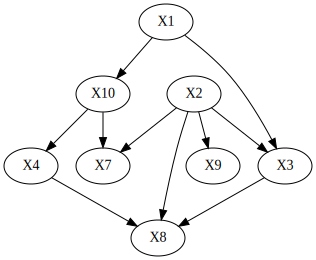

In [70]:
target_graph = aitia.graph_util.get_causal_graph_from_dot(target_str_dot)
target_graph.draw()